In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
def cplot(current_qubits, prb, qubo_prb):
    num = 4
    cmap=['#999999','#FFFF99','#CC99FF','#FF99FF','#99FF99','#99CCFF','#FFCCCC']
    fig = plt.figure()
    ax = plt.axes()
    #ax = fig.add_subplot(111)
    pcs = []
    for item in current_qubits:
        pcs.append(prb[qubo_prb[item][0]][qubo_prb[item][1]])
    print("pcs:", pcs)
    for i in range(num*num):
        x = i%num
        y = 5-i//num
        tri = plt.Polygon(((x,y),(x,y+1),(x+1/2,y+1/2)),ec='#000000', fill=False)
        ax.add_patch(tri)
        tri = plt.Polygon(((x,y+1),(x+1,y+1),(x+1/2,y+1/2)),ec='#000000', fill=False)
        ax.add_patch(tri)
        tri = plt.Polygon(((x+1,y),(x+1,y+1),(x+1/2,y+1/2)),ec='#000000', fill=False)
        ax.add_patch(tri)
        tri = plt.Polygon(((x,y),(x+1,y),(x+1/2,y+1/2)),ec='#000000', fill=False)
        ax.add_patch(tri)

    tmp=[]  #同じ場所にあるピース発見用
    for i in range(len(pcs)):
        location = pcs[i][0]
        lcf = 0
        if len(np.where(np.array(tmp)==location)[0])>0: lcf = 1
        x = location%num
        y = 5-location//num
        for j in range(1, len(pcs[i])):
            if lcf==0: cc = cmap[pcs[i][j]]
            else: cc='#FF0000'
            if j==1:
                tri = plt.Polygon(((x,y),(x,y+1),(x+1/2,y+1/2)),fc=cc, fill=True)
            if j==2:
                tri = plt.Polygon(((x,y+1),(x+1,y+1),(x+1/2,y+1/2)),fc=cc, fill=True)
            if j==3:
                tri = plt.Polygon(((x+1,y),(x+1,y+1),(x+1/2,y+1/2)),fc=cc, fill=True)
            if j==4:
                tri = plt.Polygon(((x,y),(x+1,y),(x+1/2,y+1/2)),fc=cc, fill=True)
            ax.add_patch(tri)
            tmp.append(location)
        ax.text(x, y+0.8,str(qubo_prb[current_qubits[i]][0]),color='black')
    plt.axis('scaled')
    ax.set_aspect('equal')
    plt.show()
#cplot(current_qubits, prb, qubo_prb)

In [3]:
#正答の配列
#それぞれ左、上、右、下の順
pc = [
    [0,0,1,2],
    [1,0,4,3],
    [4,0,6,1],
    [6,0,0,3],
    [0,2,5,4],
    [5,3,2,6],
    [2,1,5,3],
    [5,3,0,6],
    [0,4,1,6],
    [1,6,4,5],
    [4,3,2,1],
    [2,6,0,4],
    [0,6,3,0],
    [3,5,2,0],
    [2,1,5,0],
    [5,4,0,0],
    ]

In [4]:
#テキトウに並べ替え
p = [
    [0,0,1,2],
    [0,0,3,6],
    [0,0,5,4],
    [0,0,6,3],
    [0,4,3,1],
    [0,6,1,4],
    [0,4,2,6],
    [0,3,5,2],
    [0,2,1,5],
    [0,6,5,3],
    [0,2,5,4],
    [0,4,1,6],
    [2,6,5,3],
    [1,5,3,2],
    [4,3,2,1],
    [5,1,6,4],
    ]

In [5]:
#回転したピースを作る
#最初の１個は固定にするので回転なし
pr = []
for i, item in enumerate(p):
    tmp = []
    for j in range(4):
        tmp2=[]
        tmp2.extend(item[j:])
        tmp2.extend(item[:j])
        f=1
        for item2 in tmp:
            #すでに同じものが含まれていたら追加しない
            if np.array_equal(tmp2, item2):
                f=0
                break
        if f==1:tmp.append(tmp2)
    pr.append(tmp)
for i in range(len(pr)):
    print("pr,i:",i, pr[i])

pr,i: 0 [[0, 0, 1, 2], [0, 1, 2, 0], [1, 2, 0, 0], [2, 0, 0, 1]]
pr,i: 1 [[0, 0, 3, 6], [0, 3, 6, 0], [3, 6, 0, 0], [6, 0, 0, 3]]
pr,i: 2 [[0, 0, 5, 4], [0, 5, 4, 0], [5, 4, 0, 0], [4, 0, 0, 5]]
pr,i: 3 [[0, 0, 6, 3], [0, 6, 3, 0], [6, 3, 0, 0], [3, 0, 0, 6]]
pr,i: 4 [[0, 4, 3, 1], [4, 3, 1, 0], [3, 1, 0, 4], [1, 0, 4, 3]]
pr,i: 5 [[0, 6, 1, 4], [6, 1, 4, 0], [1, 4, 0, 6], [4, 0, 6, 1]]
pr,i: 6 [[0, 4, 2, 6], [4, 2, 6, 0], [2, 6, 0, 4], [6, 0, 4, 2]]
pr,i: 7 [[0, 3, 5, 2], [3, 5, 2, 0], [5, 2, 0, 3], [2, 0, 3, 5]]
pr,i: 8 [[0, 2, 1, 5], [2, 1, 5, 0], [1, 5, 0, 2], [5, 0, 2, 1]]
pr,i: 9 [[0, 6, 5, 3], [6, 5, 3, 0], [5, 3, 0, 6], [3, 0, 6, 5]]
pr,i: 10 [[0, 2, 5, 4], [2, 5, 4, 0], [5, 4, 0, 2], [4, 0, 2, 5]]
pr,i: 11 [[0, 4, 1, 6], [4, 1, 6, 0], [1, 6, 0, 4], [6, 0, 4, 1]]
pr,i: 12 [[2, 6, 5, 3], [6, 5, 3, 2], [5, 3, 2, 6], [3, 2, 6, 5]]
pr,i: 13 [[1, 5, 3, 2], [5, 3, 2, 1], [3, 2, 1, 5], [2, 1, 5, 3]]
pr,i: 14 [[4, 3, 2, 1], [3, 2, 1, 4], [2, 1, 4, 3], [1, 4, 3, 2]]
pr,i: 15 [[5, 1, 6, 

In [6]:
#ボードの位置
# 00 01 02 03
# 04 05 06 07
# 08 09 10 11
# 12 13 14 15

In [7]:
def add_prb(prb, prb_qubo, qubo_prb, pi, location, pri):
    tmp = [location]
    tmp.extend(pri)
    prb[pi].append(tmp)
    prb_qubo[pi].append(len(qubo_prb))
    qubo_prb.append([pi, len(prb_qubo[pi])-1])

In [8]:
#１つのピースにつき、ピースの回転×場所分のQubitを用意する。
#配列にその情報を格納しておく。
#どのピースを, どの場所に、どの回転で
#0が２つある最初のピースは左上に固定
prb=[0]*len(p)
prb_qubo=[0]*len(p)
qubo_prb=[]

#0が２つある最初のピースを左上に固定
prb[0]=[]
prb_qubo[0]=[]
#prb[0].append([0,0,0,1,2])
#prb_qubo[0].append([0])
#qubo_prb.append([0,0])
add_prb(prb, prb_qubo, qubo_prb, 0, 0, p[0])
#qubo_counter = 1
for i in range(1, len(p)):
    prb[i]=[]
    prb_qubo[i]=[]
    #counter = 0
    num0=len(np.where(np.array(p[i])==0)[0])
    for j in range(len(pr[i])):
        location = -1
        #0が２つある他のピースは、残りの角３つのどこかに配置
        if num0==2:
            #３隅をループ。zipの２番目の引数は、どこが0になるか
            for k, gp in zip([3,12,15],[[1,2],[0,3],[2,3]]):
                #ボードの隅がグレーになっているものを選ぶ
                if pr[i][j][gp[0]]==0 and pr[i][j][gp[1]]==0:
                    add_prb(prb, prb_qubo, qubo_prb, i, k, pr[i][j])
        #0が1つあるものは、辺のどこかに配置
        elif num0==1:
            #辺上のセルをループ。zipの２番目の引数は、どこが0になるか
            for k, gp in zip([1,2,4,7,8,11,13,14],[1,1,0,2,0,2,3,3]):
                #辺の部分がグレーになっているものを選ぶ
                if pr[i][j][gp]==0:
                    add_prb(prb, prb_qubo, qubo_prb, i, k, pr[i][j])
        #それ以外のは、真ん中の4つにすべての回転で配置
        else:  
            for k in [5,6,9,10]:
                add_prb(prb, prb_qubo, qubo_prb, i, k, pr[i][j])
print(prb)
print(prb_qubo)
print(qubo_prb)
print(len(qubo_prb))

[[[0, 0, 0, 1, 2]], [[12, 0, 3, 6, 0], [15, 3, 6, 0, 0], [3, 6, 0, 0, 3]], [[12, 0, 5, 4, 0], [15, 5, 4, 0, 0], [3, 4, 0, 0, 5]], [[12, 0, 6, 3, 0], [15, 6, 3, 0, 0], [3, 3, 0, 0, 6]], [[4, 0, 4, 3, 1], [8, 0, 4, 3, 1], [13, 4, 3, 1, 0], [14, 4, 3, 1, 0], [7, 3, 1, 0, 4], [11, 3, 1, 0, 4], [1, 1, 0, 4, 3], [2, 1, 0, 4, 3]], [[4, 0, 6, 1, 4], [8, 0, 6, 1, 4], [13, 6, 1, 4, 0], [14, 6, 1, 4, 0], [7, 1, 4, 0, 6], [11, 1, 4, 0, 6], [1, 4, 0, 6, 1], [2, 4, 0, 6, 1]], [[4, 0, 4, 2, 6], [8, 0, 4, 2, 6], [13, 4, 2, 6, 0], [14, 4, 2, 6, 0], [7, 2, 6, 0, 4], [11, 2, 6, 0, 4], [1, 6, 0, 4, 2], [2, 6, 0, 4, 2]], [[4, 0, 3, 5, 2], [8, 0, 3, 5, 2], [13, 3, 5, 2, 0], [14, 3, 5, 2, 0], [7, 5, 2, 0, 3], [11, 5, 2, 0, 3], [1, 2, 0, 3, 5], [2, 2, 0, 3, 5]], [[4, 0, 2, 1, 5], [8, 0, 2, 1, 5], [13, 2, 1, 5, 0], [14, 2, 1, 5, 0], [7, 1, 5, 0, 2], [11, 1, 5, 0, 2], [1, 5, 0, 2, 1], [2, 5, 0, 2, 1]], [[4, 0, 6, 5, 3], [8, 0, 6, 5, 3], [13, 6, 5, 3, 0], [14, 6, 5, 3, 0], [7, 5, 3, 0, 6], [11, 5, 3, 0, 6], [1, 

In [9]:
#１つのピースは１回だけ使える制約条件
qubo1 = np.zeros((len(qubo_prb),len(qubo_prb)))
for i in range(len(prb)):     #ピースのループ
    tmp=[]
    for j in range(len(prb[i])):#ピースの置き方のループ
        tmp.append(int(prb_qubo[i][j]))
    print(tmp)
    for j in range(len(tmp)):
        for k in range(j, len(tmp)):
            if j==k: qubo1[tmp[j]][tmp[j]]+=-1
            else: qubo1[tmp[j]][tmp[k]]+=2
print(qubo1)

[0]
[1, 2, 3]
[4, 5, 6]
[7, 8, 9]
[10, 11, 12, 13, 14, 15, 16, 17]
[18, 19, 20, 21, 22, 23, 24, 25]
[26, 27, 28, 29, 30, 31, 32, 33]
[34, 35, 36, 37, 38, 39, 40, 41]
[42, 43, 44, 45, 46, 47, 48, 49]
[50, 51, 52, 53, 54, 55, 56, 57]
[58, 59, 60, 61, 62, 63, 64, 65]
[66, 67, 68, 69, 70, 71, 72, 73]
[74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
[90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105]
[106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121]
[122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137]
[[-1.  0.  0. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  2.  2.]
 [ 0.  0.  0. ...  0. -1.  2.]
 [ 0.  0.  0. ...  0.  0. -1.]]


In [10]:
#ボード上の1つの場所には１回だけ置ける制約条件
qubo2= np.zeros((len(qubo_prb),len(qubo_prb)))
for c in range(16):  #セルをループ
    tmp=[]
    for i in range(len(prb)):     #ピースのループ
        for j in range(len(prb[i])):#ピースの置き方のループ
            if prb[i][j][0]==c: tmp.append(int(prb_qubo[i][j]))
    print(tmp)
    for j in range(len(tmp)):
        for k in range(j, len(tmp)):
            if j==k: qubo2[tmp[j]][tmp[j]]+=-1
            else: qubo2[tmp[j]][tmp[k]]+=2
print(qubo2)

[0]
[16, 24, 32, 40, 48, 56, 64, 72]
[17, 25, 33, 41, 49, 57, 65, 73]
[3, 6, 9]
[10, 18, 26, 34, 42, 50, 58, 66]
[74, 78, 82, 86, 90, 94, 98, 102, 106, 110, 114, 118, 122, 126, 130, 134]
[75, 79, 83, 87, 91, 95, 99, 103, 107, 111, 115, 119, 123, 127, 131, 135]
[14, 22, 30, 38, 46, 54, 62, 70]
[11, 19, 27, 35, 43, 51, 59, 67]
[76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136]
[77, 81, 85, 89, 93, 97, 101, 105, 109, 113, 117, 121, 125, 129, 133, 137]
[15, 23, 31, 39, 47, 55, 63, 71]
[1, 4, 7]
[12, 20, 28, 36, 44, 52, 60, 68]
[13, 21, 29, 37, 45, 53, 61, 69]
[2, 5, 8]
[[-1.  0.  0. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  0.  0.]
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ...  0.  0. -1.]]


In [11]:
#隣り合う色が同じになるような制約条件
qubo3= np.zeros((len(qubo_prb),len(qubo_prb)))
for c in range(16):  #セルをループ
    for i1 in range(len(prb)):     #ピースのループ
        for j1 in range(len(prb[i1])):#ピースの置き方のループ
            if prb[i1][j1][0]==c:
                #一番右のセル以外は、右のセルとの関係を見る
                if c%4!=3:
                    c2 = c+1
                    for i2 in range(len(prb)):     #ピースのループ
                        for j2 in range(len(prb[i2])):#ピースの置き方のループ
                            if prb[i2][j2][0]==c2:
                                minq = min(prb_qubo[i1][j1], prb_qubo[i2][j2])
                                maxq = max(prb_qubo[i1][j1], prb_qubo[i2][j2])
                                #同じ色の場合、相互作用のエネルギーが低い
                                if prb[i1][j1][3]==prb[i2][j2][1]:
                                    qubo3[minq][maxq]+=-1
                                #違う色の場合、相互作用のエネルギーが高い
                                else:
                                    qubo3[minq][maxq]+=1
                #一番下のセル以外は、下のセルとの関係を見る
                if c<=11:
                    c2 = c+4
                    for i2 in range(len(prb)):     #ピースのループ
                        for j2 in range(len(prb[i2])):#ピースの置き方のループ
                            if prb[i2][j2][0]==c2:
                                minq = min(prb_qubo[i1][j1], prb_qubo[i2][j2])
                                maxq = max(prb_qubo[i1][j1], prb_qubo[i2][j2])
                                #同じ色の場合、相互作用のエネルギーが低い
                                if prb[i1][j1][4]==prb[i2][j2][2]:
                                    qubo3[minq][maxq]+=-1
                                #違う色の場合、相互作用のエネルギーが高い
                                else:
                                    qubo3[minq][maxq]+=1
print(qubo3)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
qubo = qubo1+qubo2+qubo3*0.5

In [13]:
def get_energy(qs, qubo):
    e = np.dot(np.dot(qs, qubo), qs)
    return e

e: -37.0
current_qubits: [0, 3, 5, 7, 16, 25, 31, 36, 45, 54, 58, 67, 82, 103, 109, 128]
pcs: [[0, 0, 0, 1, 2], [3, 6, 0, 0, 3], [15, 5, 4, 0, 0], [12, 0, 6, 3, 0], [1, 1, 0, 4, 3], [2, 4, 0, 6, 1], [11, 2, 6, 0, 4], [13, 3, 5, 2, 0], [14, 2, 1, 5, 0], [7, 5, 3, 0, 6], [4, 0, 2, 5, 4], [8, 0, 4, 1, 6], [5, 5, 3, 2, 6], [6, 2, 1, 5, 3], [10, 4, 3, 2, 1], [9, 1, 6, 4, 5]]


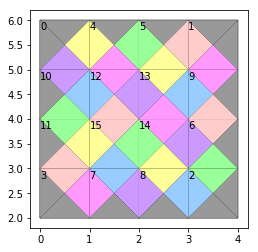

e: -39.0
current_qubits: [0, 3, 5, 7, 16, 25, 31, 36, 45, 54, 58, 67, 82, 103, 109, 128]
pcs: [[0, 0, 0, 1, 2], [3, 6, 0, 0, 3], [15, 5, 4, 0, 0], [12, 0, 6, 3, 0], [1, 1, 0, 4, 3], [2, 4, 0, 6, 1], [11, 2, 6, 0, 4], [13, 3, 5, 2, 0], [14, 2, 1, 5, 0], [7, 5, 3, 0, 6], [4, 0, 2, 5, 4], [8, 0, 4, 1, 6], [5, 5, 3, 2, 6], [6, 2, 1, 5, 3], [10, 4, 3, 2, 1], [9, 1, 6, 4, 5]]


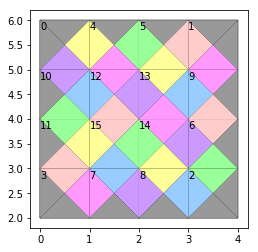

e: -38.0
current_qubits: [0, 3, 5, 7, 16, 25, 31, 36, 45, 54, 58, 67, 82, 103, 109, 128]
pcs: [[0, 0, 0, 1, 2], [3, 6, 0, 0, 3], [15, 5, 4, 0, 0], [12, 0, 6, 3, 0], [1, 1, 0, 4, 3], [2, 4, 0, 6, 1], [11, 2, 6, 0, 4], [13, 3, 5, 2, 0], [14, 2, 1, 5, 0], [7, 5, 3, 0, 6], [4, 0, 2, 5, 4], [8, 0, 4, 1, 6], [5, 5, 3, 2, 6], [6, 2, 1, 5, 3], [10, 4, 3, 2, 1], [9, 1, 6, 4, 5]]


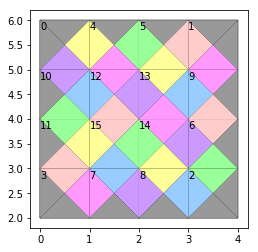

e: -40.0
current_qubits: [0, 3, 5, 7, 16, 25, 31, 36, 45, 54, 58, 67, 82, 103, 109, 128]
pcs: [[0, 0, 0, 1, 2], [3, 6, 0, 0, 3], [15, 5, 4, 0, 0], [12, 0, 6, 3, 0], [1, 1, 0, 4, 3], [2, 4, 0, 6, 1], [11, 2, 6, 0, 4], [13, 3, 5, 2, 0], [14, 2, 1, 5, 0], [7, 5, 3, 0, 6], [4, 0, 2, 5, 4], [8, 0, 4, 1, 6], [5, 5, 3, 2, 6], [6, 2, 1, 5, 3], [10, 4, 3, 2, 1], [9, 1, 6, 4, 5]]


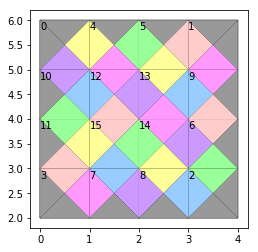

e: -40.0
current_qubits: [0, 3, 5, 7, 16, 25, 31, 36, 45, 54, 58, 67, 82, 103, 109, 128]
pcs: [[0, 0, 0, 1, 2], [3, 6, 0, 0, 3], [15, 5, 4, 0, 0], [12, 0, 6, 3, 0], [1, 1, 0, 4, 3], [2, 4, 0, 6, 1], [11, 2, 6, 0, 4], [13, 3, 5, 2, 0], [14, 2, 1, 5, 0], [7, 5, 3, 0, 6], [4, 0, 2, 5, 4], [8, 0, 4, 1, 6], [5, 5, 3, 2, 6], [6, 2, 1, 5, 3], [10, 4, 3, 2, 1], [9, 1, 6, 4, 5]]


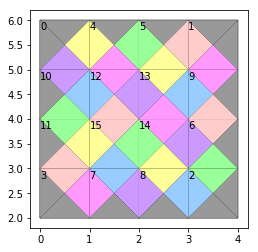

e: -40.0
current_qubits: [0, 3, 5, 7, 16, 25, 31, 36, 45, 54, 58, 67, 82, 103, 109, 128]
pcs: [[0, 0, 0, 1, 2], [3, 6, 0, 0, 3], [15, 5, 4, 0, 0], [12, 0, 6, 3, 0], [1, 1, 0, 4, 3], [2, 4, 0, 6, 1], [11, 2, 6, 0, 4], [13, 3, 5, 2, 0], [14, 2, 1, 5, 0], [7, 5, 3, 0, 6], [4, 0, 2, 5, 4], [8, 0, 4, 1, 6], [5, 5, 3, 2, 6], [6, 2, 1, 5, 3], [10, 4, 3, 2, 1], [9, 1, 6, 4, 5]]


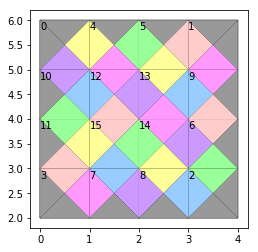

e: -40.0
current_qubits: [0, 3, 5, 7, 16, 25, 31, 36, 45, 54, 58, 67, 82, 103, 109, 128]
pcs: [[0, 0, 0, 1, 2], [3, 6, 0, 0, 3], [15, 5, 4, 0, 0], [12, 0, 6, 3, 0], [1, 1, 0, 4, 3], [2, 4, 0, 6, 1], [11, 2, 6, 0, 4], [13, 3, 5, 2, 0], [14, 2, 1, 5, 0], [7, 5, 3, 0, 6], [4, 0, 2, 5, 4], [8, 0, 4, 1, 6], [5, 5, 3, 2, 6], [6, 2, 1, 5, 3], [10, 4, 3, 2, 1], [9, 1, 6, 4, 5]]


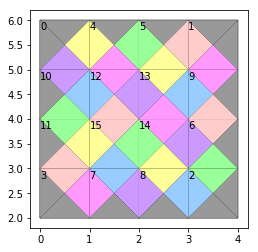

e: -38.0
current_qubits: [0, 3, 5, 7, 16, 25, 31, 36, 45, 54, 58, 67, 82, 103, 109, 128]
pcs: [[0, 0, 0, 1, 2], [3, 6, 0, 0, 3], [15, 5, 4, 0, 0], [12, 0, 6, 3, 0], [1, 1, 0, 4, 3], [2, 4, 0, 6, 1], [11, 2, 6, 0, 4], [13, 3, 5, 2, 0], [14, 2, 1, 5, 0], [7, 5, 3, 0, 6], [4, 0, 2, 5, 4], [8, 0, 4, 1, 6], [5, 5, 3, 2, 6], [6, 2, 1, 5, 3], [10, 4, 3, 2, 1], [9, 1, 6, 4, 5]]


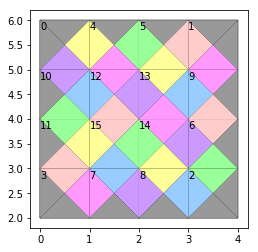

e: -38.5
current_qubits: [0, 3, 5, 7, 16, 25, 31, 36, 45, 54, 58, 67, 82, 103, 109, 128]
pcs: [[0, 0, 0, 1, 2], [3, 6, 0, 0, 3], [15, 5, 4, 0, 0], [12, 0, 6, 3, 0], [1, 1, 0, 4, 3], [2, 4, 0, 6, 1], [11, 2, 6, 0, 4], [13, 3, 5, 2, 0], [14, 2, 1, 5, 0], [7, 5, 3, 0, 6], [4, 0, 2, 5, 4], [8, 0, 4, 1, 6], [5, 5, 3, 2, 6], [6, 2, 1, 5, 3], [10, 4, 3, 2, 1], [9, 1, 6, 4, 5]]


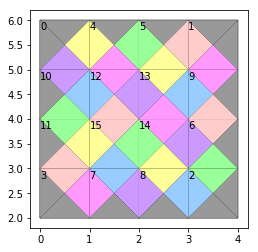

e: -40.0
current_qubits: [0, 3, 5, 7, 16, 25, 31, 36, 45, 54, 58, 67, 82, 103, 109, 128]
pcs: [[0, 0, 0, 1, 2], [3, 6, 0, 0, 3], [15, 5, 4, 0, 0], [12, 0, 6, 3, 0], [1, 1, 0, 4, 3], [2, 4, 0, 6, 1], [11, 2, 6, 0, 4], [13, 3, 5, 2, 0], [14, 2, 1, 5, 0], [7, 5, 3, 0, 6], [4, 0, 2, 5, 4], [8, 0, 4, 1, 6], [5, 5, 3, 2, 6], [6, 2, 1, 5, 3], [10, 4, 3, 2, 1], [9, 1, 6, 4, 5]]


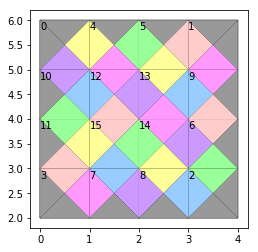

In [14]:
import dimod
from dwave_qbsolv import QBSolv
Q={}
for i in range(len(qubo)):
    for j in range(len(qubo)):
        Q.update({(i,j):qubo[i][j]})
bqm = dimod.BinaryQuadraticModel.from_qubo(Q, offset = 0.0)
for i in range(10):
    response = QBSolv().sample_qubo(Q, solver_limit=200, num_repeats=100, verbosity=0, algorithm=0)
    answers = list(response.samples())
    emin_id = -1
    emin_tmp = 100
    emin_answer = []
    for item in answers:
        c_sample = [0]*len(qubo_prb)
        for i in range(len(item)):
            if item[i]==1: c_sample[i]=1
        e = get_energy(c_sample, qubo)
        if e<emin_tmp:
            emin_tmp = e
            emin_answer = item
        #print("e:",e)
    current_qubits=[]
    for i in range(len(emin_answer)):
        if emin_answer[i]==1:current_qubits.append(i)
    e = get_energy(c_sample, qubo)
    print("e:",e)
    print("current_qubits:", current_qubits)
    cplot(current_qubits, prb, qubo_prb)
    #check_r=check_answer(current_qubits, qubo_prb, int(prb_qubo[12][0]))
    #print("チェック結果:",check_r)
    #if check_r:
    #    cplot(current_qubits, prb, False, int(prb_qubo[12][0]))
    #    break


[  0   3   5   7  16  25  31  36  45  54  58  67  75  82  97 103 109 128]
e: -42.5
pcs: [[0, 0, 0, 1, 2], [3, 6, 0, 0, 3], [15, 5, 4, 0, 0], [12, 0, 6, 3, 0], [1, 1, 0, 4, 3], [2, 4, 0, 6, 1], [11, 2, 6, 0, 4], [13, 3, 5, 2, 0], [14, 2, 1, 5, 0], [7, 5, 3, 0, 6], [4, 0, 2, 5, 4], [8, 0, 4, 1, 6], [6, 2, 6, 5, 3], [5, 5, 3, 2, 6], [10, 5, 3, 2, 1], [6, 2, 1, 5, 3], [10, 4, 3, 2, 1], [9, 1, 6, 4, 5]]


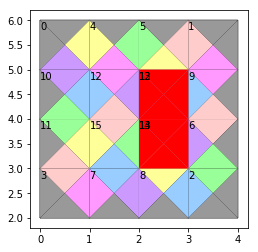

[  1   5   9  13  20  26  41  48  51  63  70  77  84  96 102 114 135]
e: -37.5
pcs: [[12, 0, 3, 6, 0], [15, 5, 4, 0, 0], [3, 3, 0, 0, 6], [14, 4, 3, 1, 0], [13, 6, 1, 4, 0], [4, 0, 4, 2, 6], [2, 2, 0, 3, 5], [1, 5, 0, 2, 1], [8, 0, 6, 5, 3], [11, 5, 4, 0, 2], [7, 1, 6, 0, 4], [10, 2, 6, 5, 3], [9, 5, 3, 2, 6], [9, 5, 3, 2, 1], [5, 2, 1, 5, 3], [5, 2, 1, 4, 3], [6, 4, 5, 1, 6]]


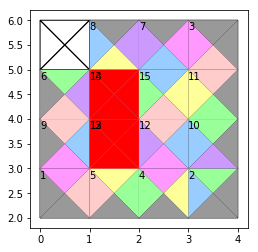

[  0   3   5   7  16  25  31  36  45  54  58  67  82  97 103 109 115 128]
e: -42.5
pcs: [[0, 0, 0, 1, 2], [3, 6, 0, 0, 3], [15, 5, 4, 0, 0], [12, 0, 6, 3, 0], [1, 1, 0, 4, 3], [2, 4, 0, 6, 1], [11, 2, 6, 0, 4], [13, 3, 5, 2, 0], [14, 2, 1, 5, 0], [7, 5, 3, 0, 6], [4, 0, 2, 5, 4], [8, 0, 4, 1, 6], [5, 5, 3, 2, 6], [10, 5, 3, 2, 1], [6, 2, 1, 5, 3], [10, 4, 3, 2, 1], [6, 2, 1, 4, 3], [9, 1, 6, 4, 5]]


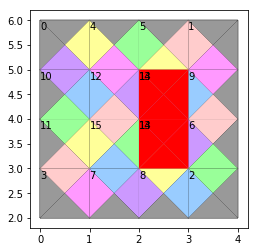

[  0   1   6   8  11  18  33  39  46  52  60  69  88  90 100 111 118 133]
e: -37.5
pcs: [[0, 0, 0, 1, 2], [12, 0, 3, 6, 0], [3, 4, 0, 0, 5], [15, 6, 3, 0, 0], [8, 0, 4, 3, 1], [4, 0, 6, 1, 4], [2, 6, 0, 4, 2], [11, 5, 2, 0, 3], [7, 1, 5, 0, 2], [13, 6, 5, 3, 0], [13, 2, 5, 4, 0], [14, 4, 1, 6, 0], [9, 3, 2, 6, 5], [5, 1, 5, 3, 2], [9, 3, 2, 1, 5], [6, 3, 2, 1, 4], [5, 1, 4, 3, 2], [10, 6, 4, 5, 1]]


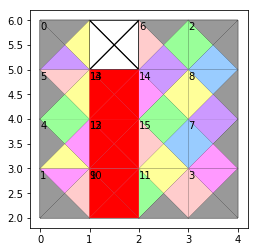

[  0   1   9  13  20  26  41  48  51  63  70  77  84  96 102 114 135]
e: -37.5
pcs: [[0, 0, 0, 1, 2], [12, 0, 3, 6, 0], [3, 3, 0, 0, 6], [14, 4, 3, 1, 0], [13, 6, 1, 4, 0], [4, 0, 4, 2, 6], [2, 2, 0, 3, 5], [1, 5, 0, 2, 1], [8, 0, 6, 5, 3], [11, 5, 4, 0, 2], [7, 1, 6, 0, 4], [10, 2, 6, 5, 3], [9, 5, 3, 2, 6], [9, 5, 3, 2, 1], [5, 2, 1, 5, 3], [5, 2, 1, 4, 3], [6, 4, 5, 1, 6]]


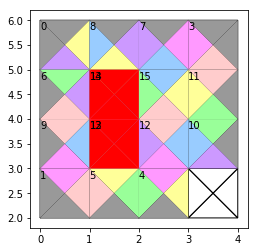

[  0   2   4   9  14  23  28  41  43  48  53  58  67  79  89  92 101 120
 122]
e: -38.5
pcs: [[0, 0, 0, 1, 2], [15, 3, 6, 0, 0], [12, 0, 5, 4, 0], [3, 3, 0, 0, 6], [7, 3, 1, 0, 4], [11, 1, 4, 0, 6], [13, 4, 2, 6, 0], [2, 2, 0, 3, 5], [8, 0, 2, 1, 5], [1, 5, 0, 2, 1], [14, 6, 5, 3, 0], [4, 0, 2, 5, 4], [8, 0, 4, 1, 6], [6, 6, 5, 3, 2], [10, 3, 2, 6, 5], [9, 1, 5, 3, 2], [10, 3, 2, 1, 5], [9, 1, 4, 3, 2], [5, 5, 1, 6, 4]]


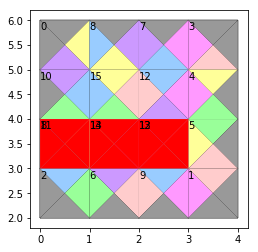

[  0   3   5   7  16  25  31  36  45  54  58  67  75  82  94 103 109 128]
e: -42.5
pcs: [[0, 0, 0, 1, 2], [3, 6, 0, 0, 3], [15, 5, 4, 0, 0], [12, 0, 6, 3, 0], [1, 1, 0, 4, 3], [2, 4, 0, 6, 1], [11, 2, 6, 0, 4], [13, 3, 5, 2, 0], [14, 2, 1, 5, 0], [7, 5, 3, 0, 6], [4, 0, 2, 5, 4], [8, 0, 4, 1, 6], [6, 2, 6, 5, 3], [5, 5, 3, 2, 6], [5, 5, 3, 2, 1], [6, 2, 1, 5, 3], [10, 4, 3, 2, 1], [9, 1, 6, 4, 5]]


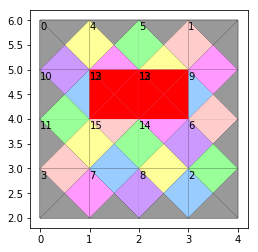

[  0   3   5   7  16  25  31  36  45  54  58  67  82  94 103 109 115 128]
e: -42.5
pcs: [[0, 0, 0, 1, 2], [3, 6, 0, 0, 3], [15, 5, 4, 0, 0], [12, 0, 6, 3, 0], [1, 1, 0, 4, 3], [2, 4, 0, 6, 1], [11, 2, 6, 0, 4], [13, 3, 5, 2, 0], [14, 2, 1, 5, 0], [7, 5, 3, 0, 6], [4, 0, 2, 5, 4], [8, 0, 4, 1, 6], [5, 5, 3, 2, 6], [5, 5, 3, 2, 1], [6, 2, 1, 5, 3], [10, 4, 3, 2, 1], [6, 2, 1, 4, 3], [9, 1, 6, 4, 5]]


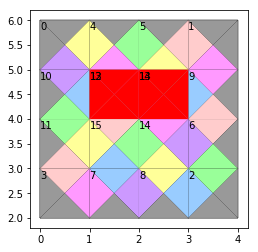

[  0   1   6   8  13  20  26  39  46  51  65  72  77  84  96 105 114 135]
e: -38.5
pcs: [[0, 0, 0, 1, 2], [12, 0, 3, 6, 0], [3, 4, 0, 0, 5], [15, 6, 3, 0, 0], [14, 4, 3, 1, 0], [13, 6, 1, 4, 0], [4, 0, 4, 2, 6], [11, 5, 2, 0, 3], [7, 1, 5, 0, 2], [8, 0, 6, 5, 3], [2, 4, 0, 2, 5], [1, 6, 0, 4, 1], [10, 2, 6, 5, 3], [9, 5, 3, 2, 6], [9, 5, 3, 2, 1], [10, 2, 1, 5, 3], [5, 2, 1, 4, 3], [6, 4, 5, 1, 6]]


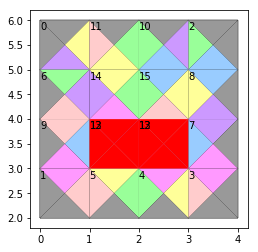

[  0   3   5   7  16  25  31  36  45  54  58  67  75  82  97 103 109 128]
e: -42.5
pcs: [[0, 0, 0, 1, 2], [3, 6, 0, 0, 3], [15, 5, 4, 0, 0], [12, 0, 6, 3, 0], [1, 1, 0, 4, 3], [2, 4, 0, 6, 1], [11, 2, 6, 0, 4], [13, 3, 5, 2, 0], [14, 2, 1, 5, 0], [7, 5, 3, 0, 6], [4, 0, 2, 5, 4], [8, 0, 4, 1, 6], [6, 2, 6, 5, 3], [5, 5, 3, 2, 6], [10, 5, 3, 2, 1], [6, 2, 1, 5, 3], [10, 4, 3, 2, 1], [9, 1, 6, 4, 5]]


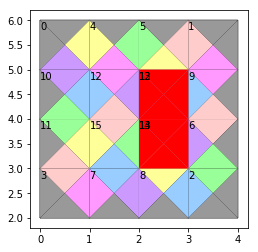

In [91]:
#blueqatでサンプリングを行う
from blueqat import opt
a = opt.opt()
a.qubo = qubo1+qubo2+qubo3
for i in range(10):
    res = a.sa()
    answer = np.where(np.array(res)==1)[0]
    print(answer)
    e = get_energy(res, qubo)
    print("e:",e)
    cplot(answer, prb, qubo_prb)

In [16]:
import dimod
from dwave_qbsolv import QBSolv
bqm = dimod.BinaryQuadraticModel.from_qubo(Q, offset = 0.0)
response = QBSolv().sample_qubo(Q, solver_limit=200, num_repeats=100, verbosity=0, algorithm=0)
answers = list(response.samples())
print(response)

   0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 ... 137 energy num_oc.
0  1  0  0  1  0  1  0  1  0  0  0  0  0  0  0  0  1  0 ...   0  -44.0      83
1  1  0  1  0  1  0  0  0  0  1  0  0  0  0  1  0  0  0 ...   0  -41.0      11
2  1  1  0  0  0  0  1  0  1  0  0  1  0  0  0  0  0  0 ...   0  -40.0       7
3  1  1  0  0  0  1  0  0  0  1  0  0  0  1  0  0  0  0 ...   0  -40.0       2
4  1  1  0  0  0  0  1  0  1  0  0  1  0  0  0  0  0  0 ...   0  -40.0       1
5  1  1  0  0  0  0  1  0  1  0  0  0  0  0  0  0  1  0 ...   0  -40.0       2
6  1  1  0  0  0  0  1  0  1  0  0  0  0  1  0  0  0  0 ...   0  -40.0       1
['BINARY', 7 rows, 107 samples, 138 variables]
